In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
student.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
student.shape[0]

1000

In [4]:
student.shape[1]

8

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
student.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
student.columns.value_counts()

gender                         1
race/ethnicity                 1
parental level of education    1
lunch                          1
test preparation course        1
math score                     1
reading score                  1
writing score                  1
Name: count, dtype: int64

In [9]:
student.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [10]:
student['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [11]:
student['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [12]:
student.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [13]:
student['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

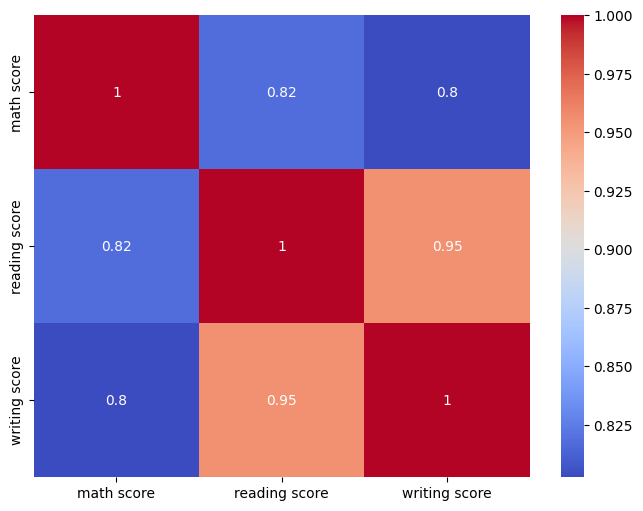

In [14]:
continuous_cols = student.select_dtypes(include='number').columns
correlation_matrix = student[continuous_cols].corr()
plt.figure(figsize=(8,6)) # size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

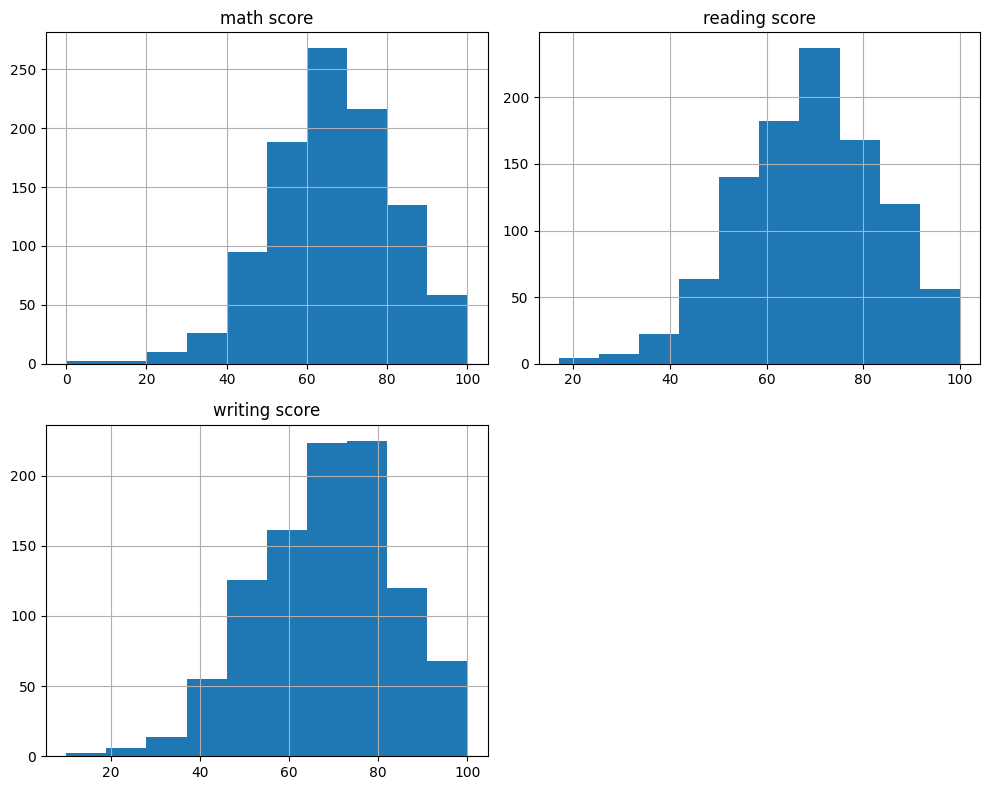

In [15]:
student.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [16]:
student.groupby('race/ethnicity')

In [17]:
pd.crosstab(student['race/ethnicity'],student.gender, margins=True)

gender,female,male,All
race/ethnicity,,,
group A,36,53,89
group B,104,86,190
group C,180,139,319
group D,129,133,262
group E,69,71,140
All,518,482,1000


In [18]:
 pd.crosstab(student['race/ethnicity'],student['test preparation course'], margins=True)

test preparation course,completed,none,All
race/ethnicity,,,
group A,31,58,89
group B,68,122,190
group C,117,202,319
group D,82,180,262
group E,60,80,140
All,358,642,1000


In [19]:
 pd.crosstab(student['lunch'],student['gender'], margins=True)

gender,female,male,All
lunch,,,
free/reduced,189,166,355
standard,329,316,645
All,518,482,1000


In [20]:
pd.crosstab(student.gender, [student['test preparation course'],student['parental level of education']], margins=True)

test preparation course              completed                                \
parental level of education associate's degree bachelor's degree high school   
gender                                                                         
female                                      42                22          29   
male                                        40                24          27   
All                                         82                46          56   

test preparation course                                                    \
parental level of education master's degree some college some high school   
gender                                                                      
female                                   14           42               35   
male                                      6           35               42   
All                                      20           77               77   

test preparation course                   none                                \
parental level of education associate's degree bachelor's degree high school   
gender                                                                         
female                                      74                41          65   
male                                        66                31          75   
All                                        140                72         140   

test preparation course                                                    \
parental level of education master's degree some college some high school   
gender                                                                      
female                                   22           76               56   
male                                     17           73               46   
All                                      39          149              102   

test preparation course       All  
parental level of education        
gender                             
female                        518  
male                          482  
All                          1000

In [21]:
student['gender'][student['math score']==student['math score'].max()]

149      male
451    female
458    female
623      male
625      male
916      male
962    female
Name: gender, dtype: object

In [22]:
student['gender'][student['math score']==student['math score'].min()]

59    female
Name: gender, dtype: object

In [23]:
student.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [24]:
student['gender'][student['math score']==student['reading score'].max()]

149      male
451    female
458    female
623      male
625      male
916      male
962    female
Name: gender, dtype: object

In [25]:
student['gender'][student['math score']==student['writing score'].max()]


149      male
451    female
458    female
623      male
625      male
916      male
962    female
Name: gender, dtype: object

In [26]:
student['gender'][student['math score']==student['writing score'].max()].count()

7

In [27]:
student['test preparation course'][student['math score']==student['reading score'].max()]

149    completed
451         none
458         none
623    completed
625    completed
916    completed
962         none
Name: test preparation course, dtype: object

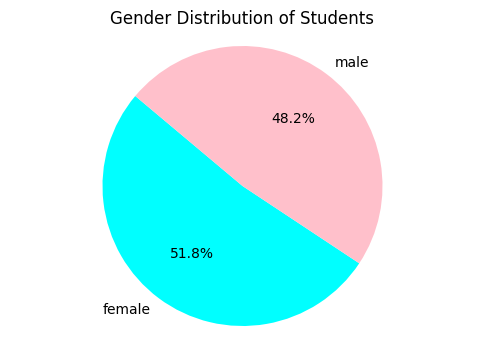

In [28]:
gender_counts = student['gender'].value_counts()

# Define colors for each category
colors = ['cyan', 'pink']

# Plotting the pie chart
plt.figure(figsize=(6,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

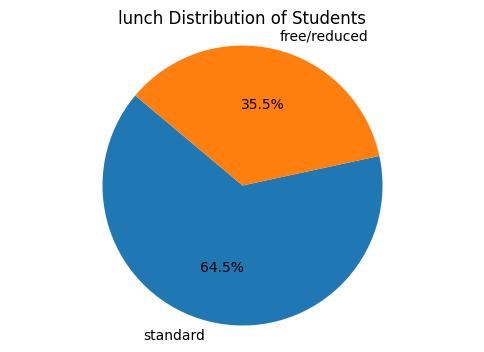

In [29]:
lunch_counts = student['lunch'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6,4))
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('lunch Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

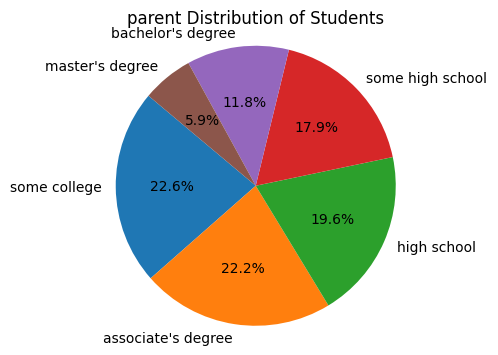

In [30]:
parent_counts = student['parental level of education'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(6,4))
plt.pie(parent_counts, labels=parent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('parent Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

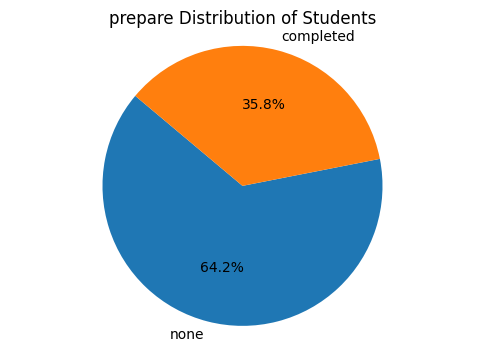

In [31]:
prepare_counts = student['test preparation course'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(6,4))
plt.pie(prepare_counts, labels=prepare_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('prepare Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()